In [1]:
#!pip install plotly_express

In [2]:
# 데이터 읽기

import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)

In [3]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


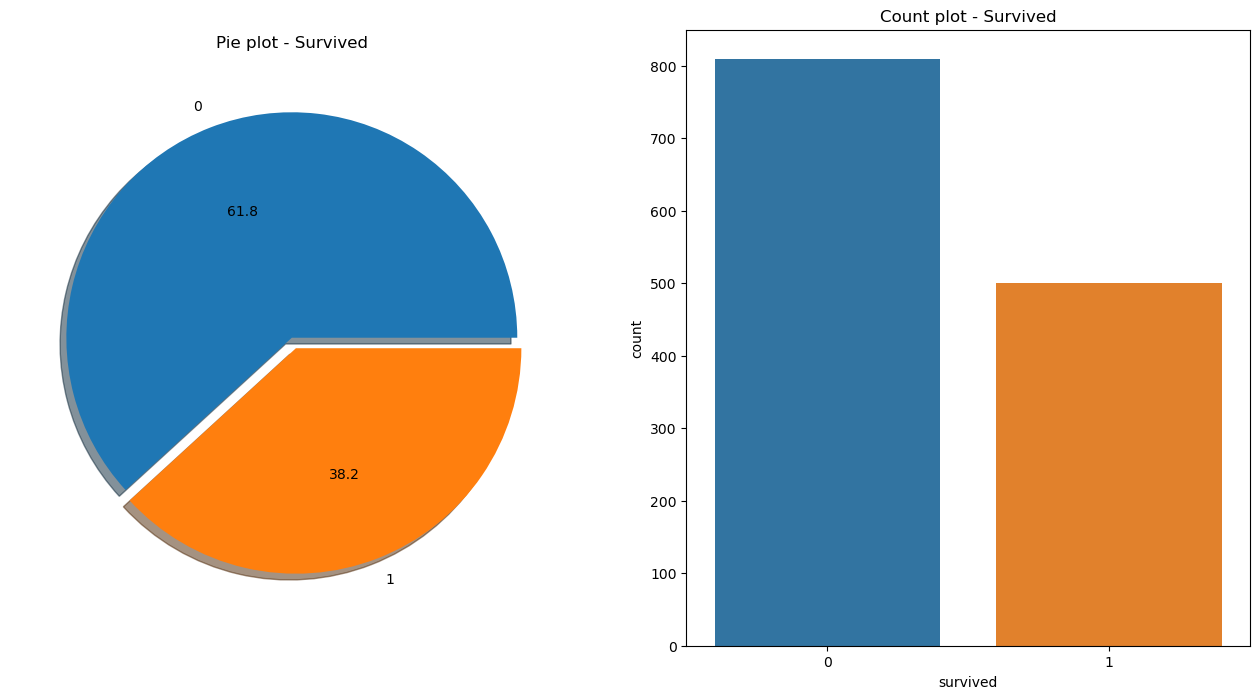

In [7]:
# 생존 상황에 대한 시각화를 해보자.

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1,2, figsize = (16,8))

#첫번째 차트
titanic['survived'].value_counts().plot.pie(ax = ax[0], # 첫번째 필드에 pi차트를 그려라
                                            autopct = '%1.1f',# 비율
                                            shadow = True, # 그림자
                                            explode = [0,0.05] # pie가 떨어질 크기
                                            ) 
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

#두번째 차트
sns.countplot(x = 'survived', data = titanic, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

800명에 가까운(61.8%) 사람들이 생존하지 못한 것으로 보인다.

그렇다면 성별에 따른 생존 상황은 어떨까?

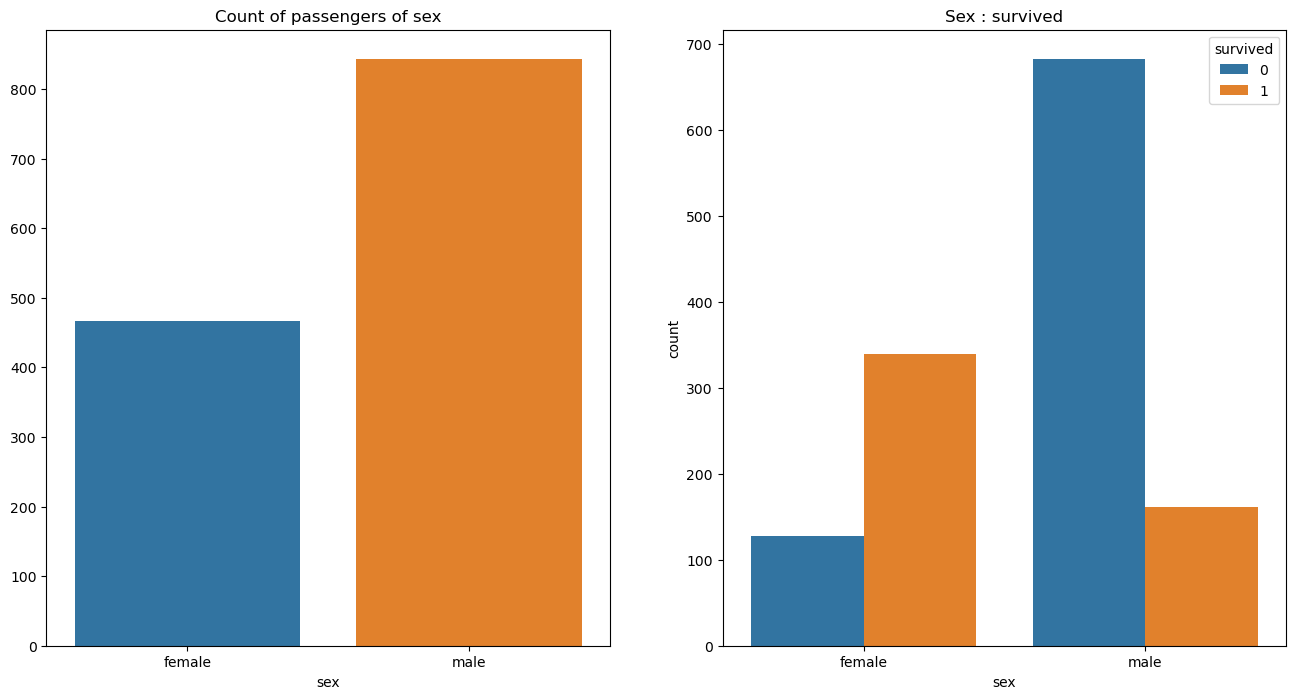

In [19]:
f, ax = plt.subplots(1,2, figsize = (16,8))

#첫번째 차트
sns.countplot(x = 'sex', data = titanic, ax = ax[0])
ax[0].set_title('Count of passengers of sex')
ax[0].set_ylabel('')

#두번째 차트
sns.countplot(x = 'sex', data = titanic, hue = 'survived', ax = ax[1])
ax[1].set_title('Sex : survived')

plt.show()

여성보다 남성이 더 많이 타이타닉에 탑승했다는 것과

남성의 생존 가능성이 더 낮은 것을 볼 수 있다.

그렇다면 객실 등급별 생존 상황은 어떠할까?

In [20]:
# pclass vs survived

pd.crosstab(titanic['pclass'], titanic['survived'], margins = True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


1등실의 생존 가능성이 아주 높은 것을 볼 수 있다.

앞서 여성이 생존 비율이 높았는데, 그럼 객실 등급별 성별 비율은 어떻게 될까?

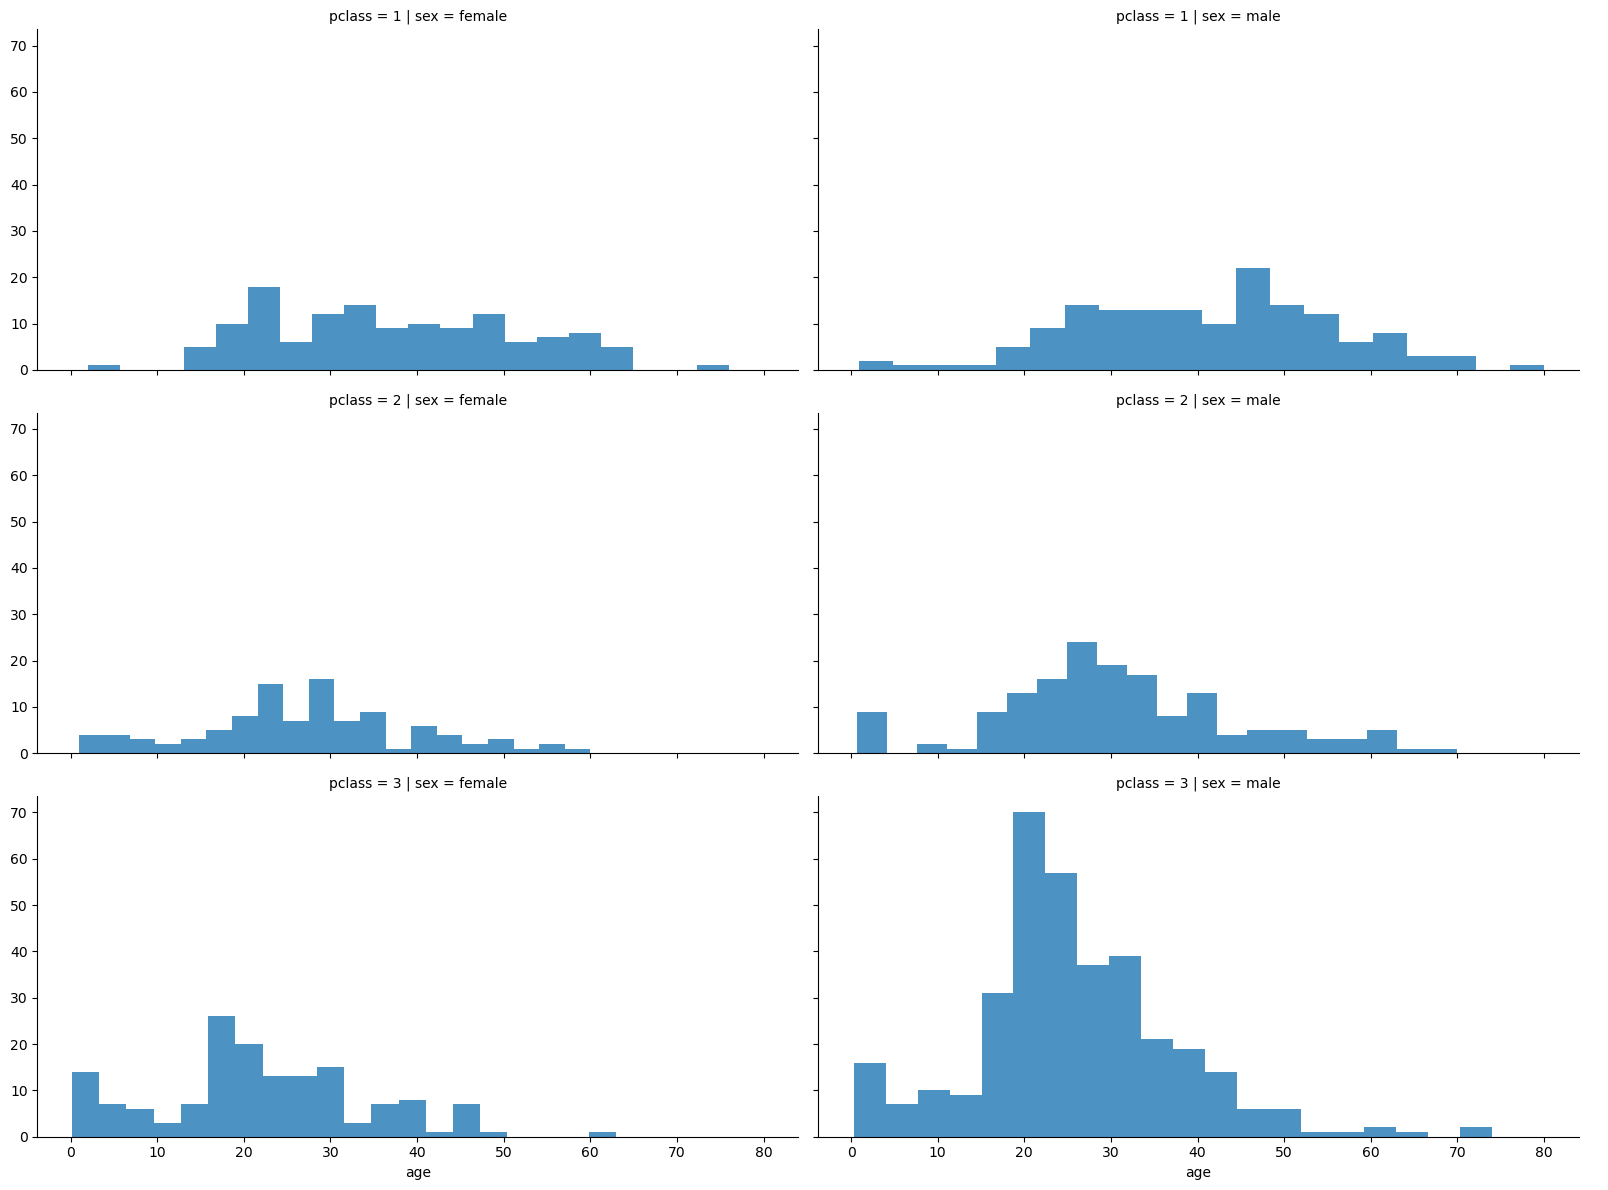

In [21]:
# 객실 등급 및 나이별 성별 분포

grid = sns.FacetGrid(titanic, row = 'pclass', col = 'sex', height = 4, aspect = 2)
grid.map(plt.hist, 'age', alpha = 0.8, bins = 20)
grid.add_legend()

특이하게 3등실에는 20대 남성의 분포가 많아보인다.

연령별 탑승 현황을 한 번 살펴보자.

In [22]:
# age 

import plotly.express as ps # 마우스오버하면 해당 데이터의 내용을 보여주는 효과가 있음

fig = ps.histogram(titanic, x = 'age')
fig.show()

20대가 많이 탑승한 것 같다.

등실별 생존 상황을 연령별로 관찰해보자.

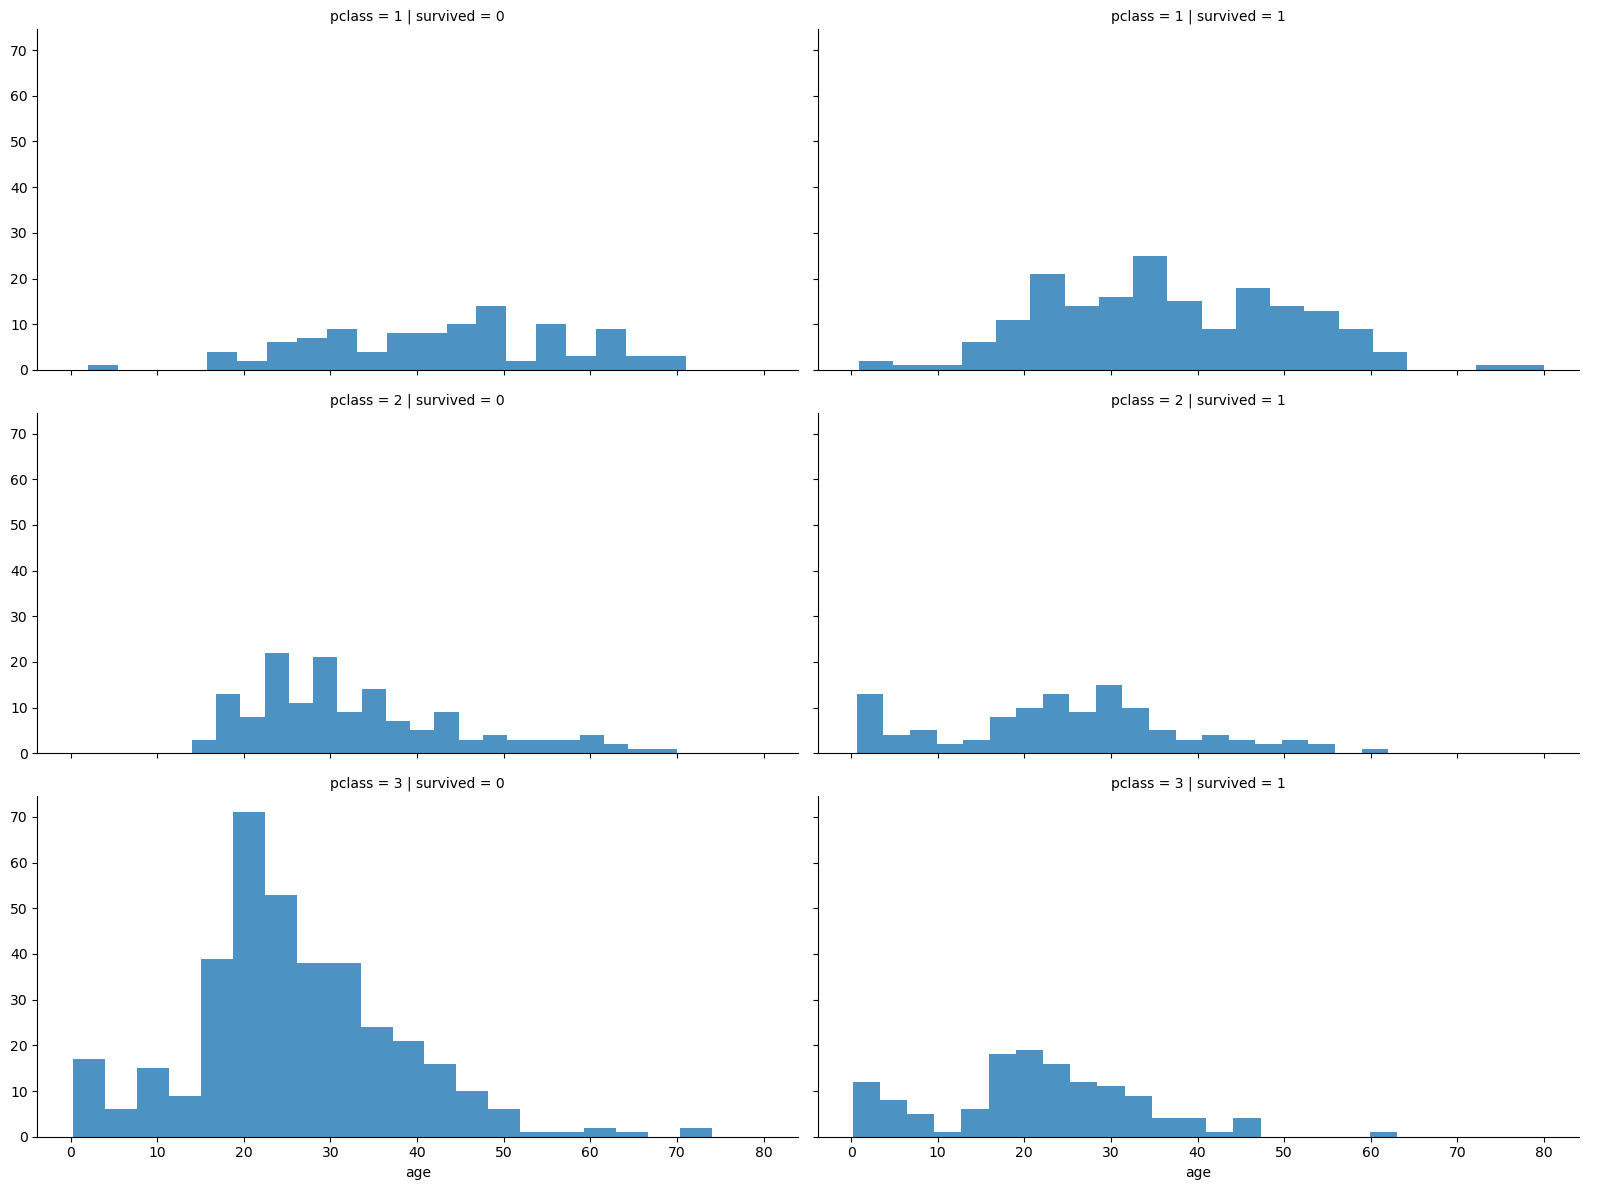

In [23]:
grid = sns.FacetGrid(titanic, row = 'pclass', col='survived', height = 4, aspect = 2)
grid.map(plt.hist, 'age', alpha = 0.8, bins = 20)
grid.add_legend()

3등실의 20-30대 연령대의 승객들이 대부분 살아남지 못한 것으로 보인다.

In [24]:
# 범위를 지정하여 라벨링할 수 있는 기능 
# pd.cut(데이터, bins = [범위], labels = [라벨링할 이름들])

titanic['age_cat'] = pd.cut(titanic['age'], bins = [0,7,15,30,60,100],
       include_lowest=True, labels=['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


'age_cat' 필드를 이용해 나이, 성별, 객실별 생존자 수를 한 번에 파악할 수 있을까?

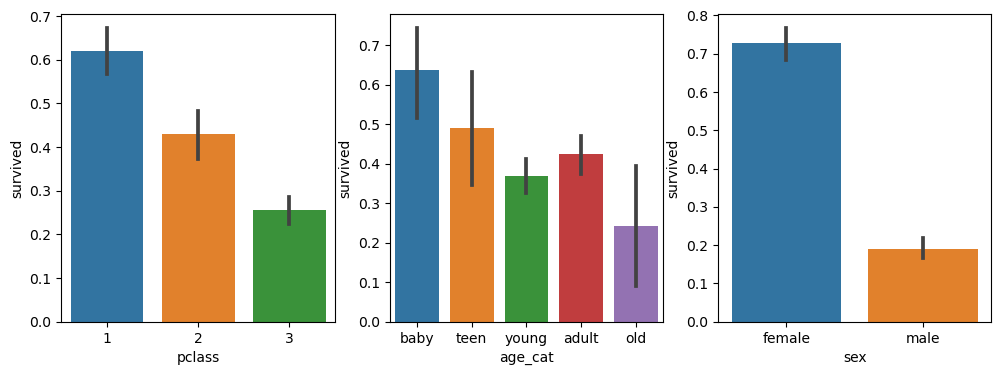

In [25]:
plt.figure(figsize=(12,4))

# 객실별 생존율
plt.subplot(131) # 1행 3열 중 첫 번째
sns.barplot(x = 'pclass', y = 'survived', data = titanic)

# age_cat별 생존율
plt.subplot(132) # 1행 3열 중 두 번째
sns.barplot(x = 'age_cat', y = 'survived', data = titanic)

# 성별 생존율
plt.subplot(133) # 1행 3열 중 세 번째
sns.barplot(x = 'sex', y = 'survived', data = titanic)

plt.show()

survived 필드에서 1이 생존을 뜻하는 것이므로 해당 차트에서 1에 가까울수록 생존율이 높다고 말할 수 있을 것이다.

그렇다면, 나이가 어리고 여성이며 1등실에 탑승한 승객일수록 생존하기 유리했을까?

성별 및 나이별 생존 상황을 다시 한 번 살펴보자

C:\Users\nabi4\AppData\Local\Temp\ipykernel_22040\390820836.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nabi4\AppData\Local\Temp\ipykernel_22040\390820836.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\nabi4\AppData\Local\Temp\ipykernel_22040\390820836.py:11: UserWarning:



`distplot` is a

Text(0.5, 1.0, 'Male')

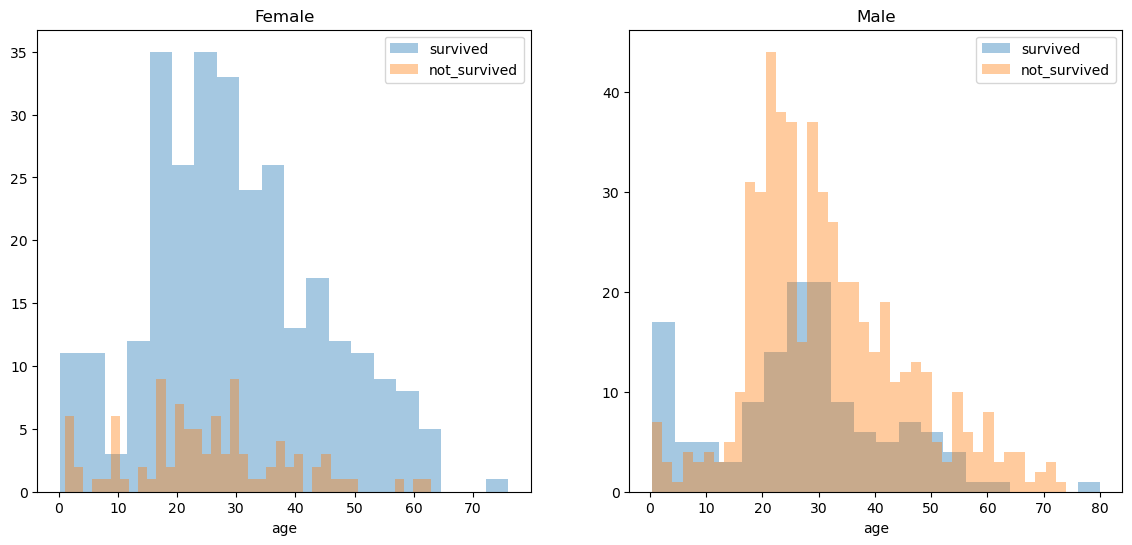

In [31]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (14,6))

women = titanic[titanic['sex'] == 'female']
men = titanic[titanic['sex'] == 'male']

ax = sns.distplot(women[women['survived'] == 1]['age'], bins = 20, label = 'survived', ax = axes[0], kde = False)
ax = sns.distplot(women[women['survived'] == 0]['age'], bins = 40, label = 'not_survived', ax = axes[0], kde = False)
ax.legend()
ax.set_title("Female")

ax = sns.distplot(men[men['survived'] == 1]['age'], bins = 20, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived'] == 0]['age'], bins = 40, label = 'not_survived', ax = axes[1], kde = False)
ax.legend()
ax.set_title("Male")

20-30대만 보았을 때 여성은 대부분 살아남은 반면, 남성은 그렇지 않은 것을 볼 수 있다.

---

그리고 특이하게 탑승객의 이름에서 신분을 알아낼 수도 있다.

In [32]:
for idx, dataset in titanic.iterrows():
    print(dataset['name'])
    # '성, 사회적신분. 이름' 형태로 출력되고 있음

Allen, Miss. Elisabeth Walton
Allison, Master. Hudson Trevor
Allison, Miss. Helen Loraine
Allison, Mr. Hudson Joshua Creighton
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Anderson, Mr. Harry
Andrews, Miss. Kornelia Theodosia
Andrews, Mr. Thomas Jr
Appleton, Mrs. Edward Dale (Charlotte Lamson)
Artagaveytia, Mr. Ramon
Astor, Col. John Jacob
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Aubart, Mme. Leontine Pauline
Barber, Miss. Ellen "Nellie"
Barkworth, Mr. Algernon Henry Wilson
Baumann, Mr. John D
Baxter, Mr. Quigg Edmond
Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Bazzani, Miss. Albina
Beattie, Mr. Thomson
Beckwith, Mr. Richard Leonard
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Behr, Mr. Karl Howell
Bidois, Miss. Rosalie
Bird, Miss. Ellen
Birnbaum, Mr. Jakob
Bishop, Mr. Dickinson H
Bishop, Mrs. Dickinson H (Helen Walton)
Bissette, Miss. Amelia
Bjornstrom-Steffansson, Mr. Mauritz Hakan
Blackwell, Mr. Stephen Weart
Blank, Mr. Henry
Bonnell, Miss. Caroline
Bonnell, Miss

In [57]:
# data = []
# for idx, dataset in titanic.iterrows():
#     tmp = dataset['name']
#     data.append(tmp.split(' ')[1][:-1])
# data

['Miss',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Col',
 'Mrs',
 'Mme',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Major',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mrs',
 'Capt',
 'Miss',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Dr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Gordon',
 'Gordon',
 'Mr',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Dr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Col',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr

In [35]:
import re

title = []
for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    title.append(re.search('\,\s\w+(\s\w+)?\.', tmp).group()[2:-1])

title

['Miss',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Col',
 'Mrs',
 'Mme',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mr',
 'Dr',
 'Mrs',
 'Mrs',
 'Mrs',
 'Miss',
 'Major',
 'Mr',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mr',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Miss',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mrs',
 'Mr',
 'Capt',
 'Miss',
 'Mrs',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mrs',
 'Dr',
 'Master',
 'Mrs',
 'Mr',
 'Mrs',
 'Mrs',
 'Lady',
 'Sir',
 'Mr',
 'Mrs',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mr',
 'Miss',
 'Miss',
 'Miss',
 'Mr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Dr',
 'Mr',
 'Mrs',
 'Miss',
 'Mr',
 'Mrs',
 'Mr',
 'Mr',

In [36]:
titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


사회적 신분에 따른 생존 상황도 살펴보자.

In [37]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [38]:
titanic['title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [40]:
# 잘 모르는 title도 있으니 새로 값을 만들어주자

titanic['title']  = titanic['title'].replace('Mlle', 'Miss')
titanic['title']  = titanic['title'].replace('Ms', 'Miss')
titanic['title']  = titanic['title'].replace('Mme', 'Mrs')

Rare_f = ['Dona', 'Lady', 'the Countess']
Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Dr', 'Master', 'Jonkheer']


In [41]:
for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')

for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')

titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

In [42]:
titanic[['title', 'survived']].groupby(['title'], as_index = False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,1.000000
4,Rare_m,0.448276


평민 남성(Mr) < 귀족 남성(Rare_m) < 평민 여성(Miss, Mrs) < 귀족 여성(Rare_f) 순으로 생존율이 높다.

## 머신러닝을 이용한 생존자 예측

In [43]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


앞선 EDA를 통해 'pclass', 'age', 'sibsp', 'parch', 'fare', 'gender' 컬럼을 사용해서 예측해볼 수 있을 것 같다.

In [44]:
titanic['sex'].unique() # 먼저 학습을 시키기 위해선 데이터가 모두 숫자 형태여야한다.

array(['female', 'male'], dtype=object)

In [45]:
# Label Encoder를 통해 문자열을 숫자로 바꿔보자.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # 문자열을 숫자로 변환시켜주는 도구
le.fit(titanic['sex']) # 변환시킬 데이터 fit

LabelEncoder()

In [46]:
titanic['gender'] = le.transform(titanic['sex']) # 데이터 변환
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


그 다음 결측치를 확인해보아야 한다.

In [47]:
# 결측치를 처리하는 방법은 다양하지만 지금은 삭제하도록 하자
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


C:\Users\nabi4\AppData\Local\Temp\ipykernel_22040\930520856.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

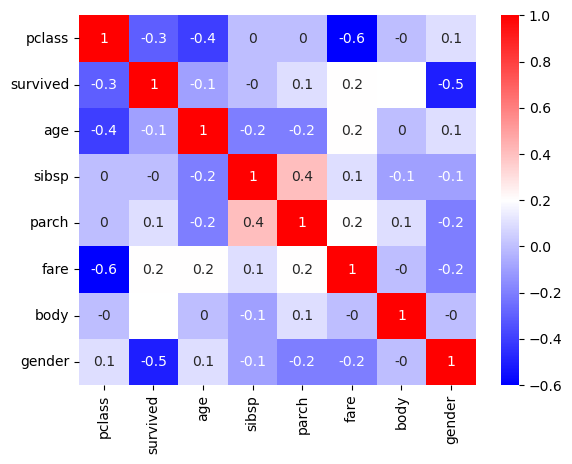

In [48]:
# 상관관계도 한 번 살펴보자.
correlation_matrix = titanic.corr().round(1)
sns.heatmap(data = correlation_matrix, annot = True, cmap = 'bwr')

In [49]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'age_cat',
       'title', 'gender'],
      dtype='object')

데이터 추출 및 분리

In [50]:
from sklearn.model_selection import train_test_split

X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]
y = titanic['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

모델 학습

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=13)

In [52]:
pred = dt.predict(X_test)
accuracy_score(y_test, pred)

0.7655502392344498

모델을 학습시켰다.

디카프리오라는 인물을 특정짓고 그가 살아남을 수 있을지 살펴보자.

In [56]:
# ['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']

import numpy as np

dicaprio = np.array([[3 ,18 ,0 ,0 ,5 , 1]]) # 디카프리오의 데이터를 특정 짓기

print('Dicaprio : ', dt.predict_proba(dicaprio)[0,1])
# dt.predict_proba(dicaprio) 는 생존X 확률과 생존 확률을 모두 보여주므로
# 생존 확률만 추출하려면 [0,1]을 해주어야한다.

Dicaprio :  0.16728624535315986


c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [54]:
winslet = np.array([[1,16,1,1,100,0]])
print('Winslet : ', dt.predict_proba(winslet)[0,1])

Winslet :  1.0


c:\Users\nabi4\anaconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

